# Install

In [1]:
# Install `drcutils`
!pip install git+https://github.com/cmudrc/drcutils -qqq

     |████████████████████████████████| 452 kB 7.0 MB/s 
     |████████████████████████████████| 13.8 MB 49.0 MB/s 
     |████████████████████████████████| 182 kB 40.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.6 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 212 kB 7.3 MB/s 
     |████████████████████████████████| 132 kB 41.9 MB/s 
     |████████████████████████████████| 127 kB 42.7 MB/s 
     |████████████████████████████████| 278 kB 38.9 MB/s 
     |████████████████████████████████| 106 kB 57.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 2.3 MB 42.3 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |██████████████████████

In [2]:
import drcutils.plotting_stack as dps
import plotly.graph_objects
import numpy

# Logos

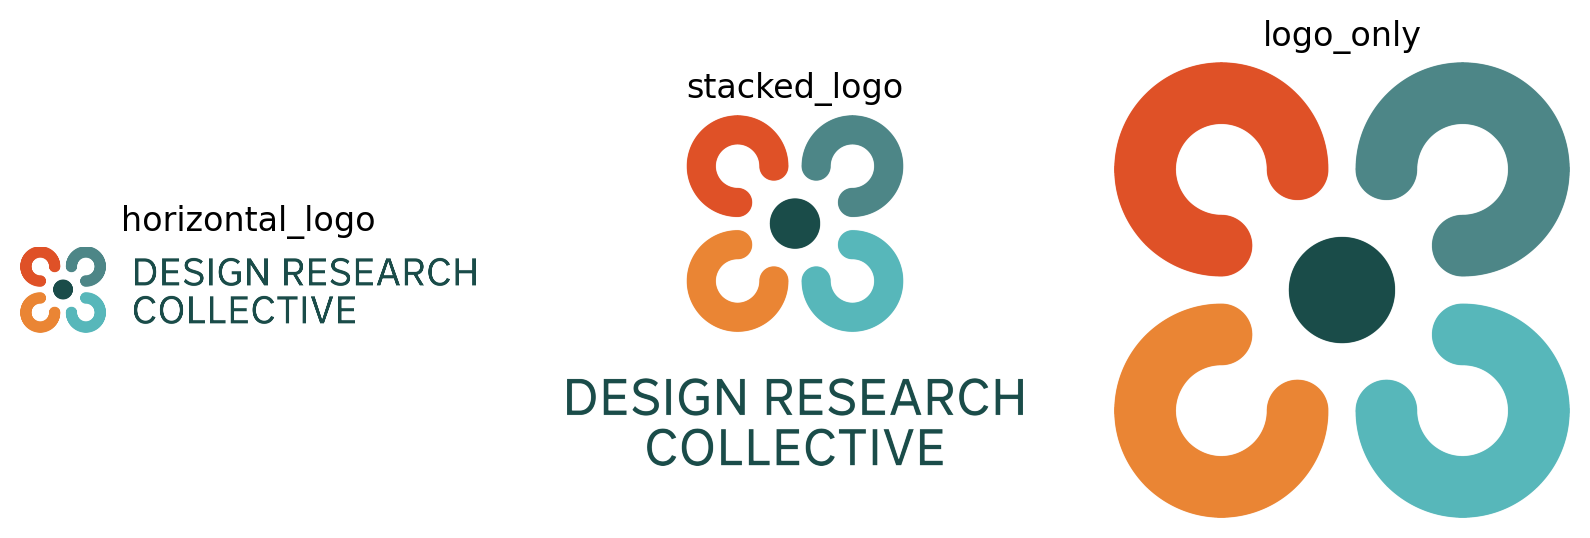

In [3]:
# Make a figure to plot on
fig = dps.matplotlib.pyplot.figure()

# This is what we'll plot
brand_images = [
    ("horizontal_logo", dps.horizontal_logo.IMAGE_OBJECT),
    ("stacked_logo", dps.stacked_logo.IMAGE_OBJECT),
    ("logo_only", dps.logo_only.IMAGE_OBJECT),
]

# Iterate through subplots
subplot_index = 131
for im in brand_images:
    sp = dps.matplotlib.pyplot.subplot(subplot_index)
    ax = sp.imshow(im[1])
    sp.set_title(im[0])
    dps.matplotlib.pyplot.axis('off');
    subplot_index += 1

# Make sure it looks ok
fig.set_figwidth(10)
fig.set_dpi(200)

# Brand colors

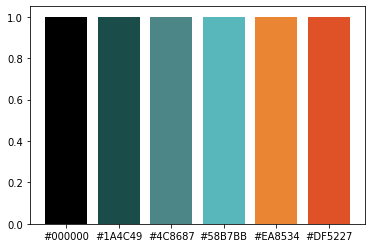

In [4]:
# Make a bar plot with the DRC colors. Labels on the x-axis are hex codes
dps.matplotlib.pyplot.bar(
    [1, 2, 3, 4, 5, 6], 
    [1, 1, 1, 1, 1, 1], 
    color=dps.COLORS, tick_label=dps.COLORS
);

# Colormaps

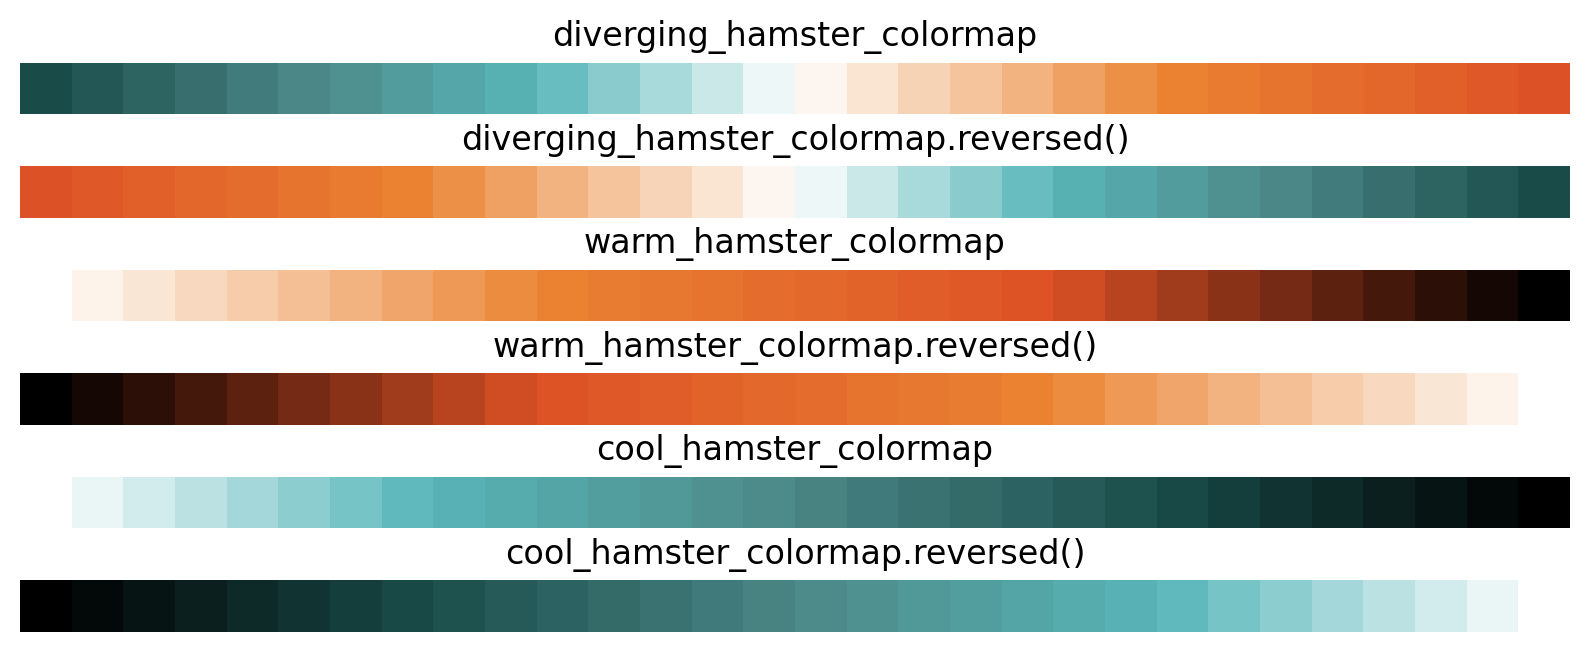

In [5]:
# Make a figure to plot on
fig = dps.matplotlib.pyplot.figure()

# This is what we'll plot
colormaps = [
    dps.diverging_hamster_colormap,
    dps.warm_hamster_colormap,
    dps.cool_hamster_colormap   
]

# Iterate through subplots
subplot_index = 611
for cm in colormaps:
    for reversed in [False, True]:
        sp = dps.matplotlib.pyplot.subplot(subplot_index)
        ax = sp.imshow([numpy.linspace(0, 1, 30)], cmap=(cm.reversed() if reversed else cm))
        sp.set_title(cm.name + ("_colormap.reversed()" if reversed else "_colormap"))
        dps.matplotlib.pyplot.axis('off');
        subplot_index += 1

# Make sure it looks ok
fig.set_figwidth(10)
fig.set_dpi(200)

# Load STL Logo

In [6]:
def plot_mesh(stl_mesh, color):
    # stl_mesh is read by nympy-stl from a stl file; it is  an array of faces/triangles (i.e. three 3d points) 
    # this function extracts the unique vertices and the lists I, J, K to define a Plotly mesh3d
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    # the array stl_mesh.vectors.reshape(p*q, r) can contain multiple copies of the same vertex;
    # extract unique vertices from all mesh triangles
    vertices, ixr = numpy.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = numpy.take(ixr, [3*k for k in range(p)])
    J = numpy.take(ixr, [3*k+1 for k in range(p)])
    K = numpy.take(ixr, [3*k+2 for k in range(p)])
    x, y, z = vertices.T
    colorscale= [[0, color], [1, color]]  

    mesh3D = plotly.graph_objects.Mesh3d(
            x=x,
            y=y,
            z=z, 
            i=I, 
            j=J, 
            k=K, 
            flatshading=True,
            colorscale=colorscale, 
            intensity=z, 
            showscale=False) 
    layout = plotly.graph_objects.Layout(
            scene_xaxis_visible=False,
            scene_yaxis_visible=False,
            scene_zaxis_visible=False,
            scene_aspectmode="data"
            )
    fig = plotly.graph_objects.Figure(data=[mesh3D], layout=layout)
    fig.data[0].update(lighting=dict(ambient= 0.18,
                                 diffuse= 1,
                                 fresnel=  .1,
                                 specular= 1,
                                 roughness= .1,
                                 facenormalsepsilon=0))
    return fig

In [7]:
plot_mesh(dps.logo_only.MESH_OBJECT, dps.COLORS[4])